In [ ]:
import pandas as pd
import requests
import io
import os
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
url = "https://raw.githubusercontent.com/jerrywu2013/Hiskio_data/master/COVID-19.csv"
s = requests.get(url).content
COVID = pd.read_csv(io.StringIO(s.decode('utf-8')))
df = COVID

In [ ]:
df

,patientid,sex,age,finding,RT_PCR_positive,survival,intubated,in_icu,needed_supplemental_O2,date
0,2,M,65.0,COVID-19,Y,Y,N,N,Y,22-Jan-20
1,2,M,65.0,COVID-19,Y,Y,N,N,Y,25-Jan-20
2,2,M,65.0,COVID-19,Y,Y,N,N,Y,27-Jan-20
3,2,M,65.0,COVID-19,Y,Y,N,N,Y,28-Jan-20
4,4,F,52.0,COVID-19,Y,NaN,N,N,N,25-Jan-20
...,...,...,...,...,...,...,...,...,...,...
925,468,F,50.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,NaN
926,469,F,25.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,NaN
927,469,F,25.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,NaN
928,470,M,55.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               930 non-null    object 
 1   sex                     850 non-null    object 
 2   age                     693 non-null    float64
 3   finding                 930 non-null    object 
 4   RT_PCR_positive         582 non-null    object 
 5   survival                358 non-null    object 
 6   intubated               243 non-null    object 
 7   in_icu                  331 non-null    object 
 8   needed_supplemental_O2  88 non-null     object 
 9   date                    650 non-null    object 
dtypes: float64(1), object(9)
memory usage: 72.8+ KB


In [ ]:
df.head()

,patientid,sex,age,finding,RT_PCR_positive,survival,intubated,in_icu,needed_supplemental_O2,date
0,2,M,65.0,COVID-19,Y,Y,N,N,Y,22-Jan-20
1,2,M,65.0,COVID-19,Y,Y,N,N,Y,25-Jan-20
2,2,M,65.0,COVID-19,Y,Y,N,N,Y,27-Jan-20
3,2,M,65.0,COVID-19,Y,Y,N,N,Y,28-Jan-20
4,4,F,52.0,COVID-19,Y,NaN,N,N,N,25-Jan-20


In [ ]:
newdf = df.dropna(axis=1,how='all') 
newdf = newdf.fillna('NN')

In [ ]:
newdf

,patientid,sex,age,finding,RT_PCR_positive,survival,intubated,in_icu,needed_supplemental_O2,date
0,2,M,65,COVID-19,Y,Y,N,N,Y,22-Jan-20
1,2,M,65,COVID-19,Y,Y,N,N,Y,25-Jan-20
2,2,M,65,COVID-19,Y,Y,N,N,Y,27-Jan-20
3,2,M,65,COVID-19,Y,Y,N,N,Y,28-Jan-20
4,4,F,52,COVID-19,Y,NN,N,N,N,25-Jan-20
...,...,...,...,...,...,...,...,...,...,...
925,468,F,50,Pneumonia,NN,NN,NN,NN,NN,NN
926,469,F,25,Pneumonia,NN,NN,NN,NN,NN,NN
927,469,F,25,Pneumonia,NN,NN,NN,NN,NN,NN
928,470,M,55,Pneumonia,NN,NN,NN,NN,NN,NN


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(newdf["sex"].unique())
list(le.classes_)
sex_le = le.transform(newdf["sex"])
#category_le
#len(category_le)
#category_le[0:100]
#list(le.inverse_transform([64, 3, 8]))
newdf["sex_le"] = sex_le

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(newdf["finding"].unique())
list(le.classes_)
finding_le = le.transform(newdf["finding"])
newdf["finding_le"] = finding_le
#COVID-19 = 5

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(newdf["RT_PCR_positive"].unique())
list(le.classes_)
RT_PCR_positive_le = le.transform(newdf["RT_PCR_positive"])
newdf["RT_PCR_positive_le"] = RT_PCR_positive_le

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(newdf["survival"].unique())
list(le.classes_)
survival_le = le.transform(newdf["survival"])
newdf["survival_le"] = survival_le

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(newdf["intubated"].unique())
list(le.classes_)
intubated_le = le.transform(newdf["intubated"])
newdf["intubated_le"] = intubated_le

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(newdf["in_icu"].unique())
list(le.classes_)
in_icu_le = le.transform(newdf["in_icu"])
newdf["in_icu_le"] = in_icu_le

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(newdf["needed_supplemental_O2"].unique())
list(le.classes_)
needed_supplemental_O2_le = le.transform(newdf["needed_supplemental_O2"])
newdf["needed_supplemental_O2_le"] = needed_supplemental_O2_le

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(newdf["date"].unique())
list(le.classes_)
date_le = le.transform(newdf["date"])
newdf["date_le"] = date_le

In [ ]:
newdf

,patientid,sex,age,finding,RT_PCR_positive,survival,intubated,in_icu,needed_supplemental_O2,date,sex_le,finding_le,RT_PCR_positive_le,survival_le,intubated_le,in_icu_le,needed_supplemental_O2_le,date_le
0,2,M,65,COVID-19,Y,Y,N,N,2,22-Jan-20,1,5,2,2,0,0,2,41
1,2,M,65,COVID-19,Y,Y,N,N,2,25-Jan-20,1,5,2,2,0,0,2,45
2,2,M,65,COVID-19,Y,Y,N,N,2,27-Jan-20,1,5,2,2,0,0,2,50
3,2,M,65,COVID-19,Y,Y,N,N,2,28-Jan-20,1,5,2,2,0,0,2,51
4,4,F,52,COVID-19,Y,NN,N,N,0,25-Jan-20,0,5,2,1,0,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,468,F,50,Pneumonia,NN,NN,NN,NN,1,NN,0,34,0,1,1,1,1,73
926,469,F,25,Pneumonia,NN,NN,NN,NN,1,NN,0,34,0,1,1,1,1,73
927,469,F,25,Pneumonia,NN,NN,NN,NN,1,NN,0,34,0,1,1,1,1,73
928,470,M,55,Pneumonia,NN,NN,NN,NN,1,NN,1,34,0,1,1,1,1,73


In [ ]:
col_data = ['date_le','sex_le', 'RT_PCR_positive_le','survival_le','intubated_le','in_icu_le','needed_supplemental_O2_le']
new_pd = pd.DataFrame(newdf[col_data])
X = new_pd
y = newdf["finding_le"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

##隨機森林(Random Forests)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp
#['amt.pledged','currency_le','percentage.funded','state_le','type_le']

RT_PCR_positive_le           0.519843
date_le                      0.195217
intubated_le                 0.086275
in_icu_le                    0.072210
sex_le                       0.046082
survival_le                  0.045932
needed_supplemental_O2_le    0.034440
dtype: float64

No handles with labels found to put in legend.


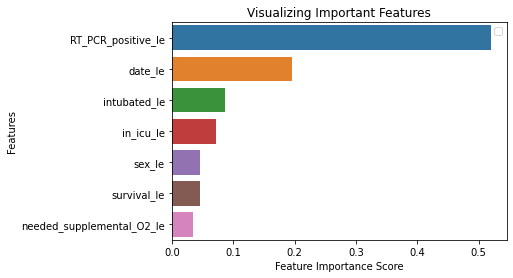

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
le.fit(newdf["finding"].unique())
list(le.classes_)
finding_le = le.transform(newdf["finding"])
#le.inverse_transform(y)

In [ ]:
estimator = clf.estimators_[10]

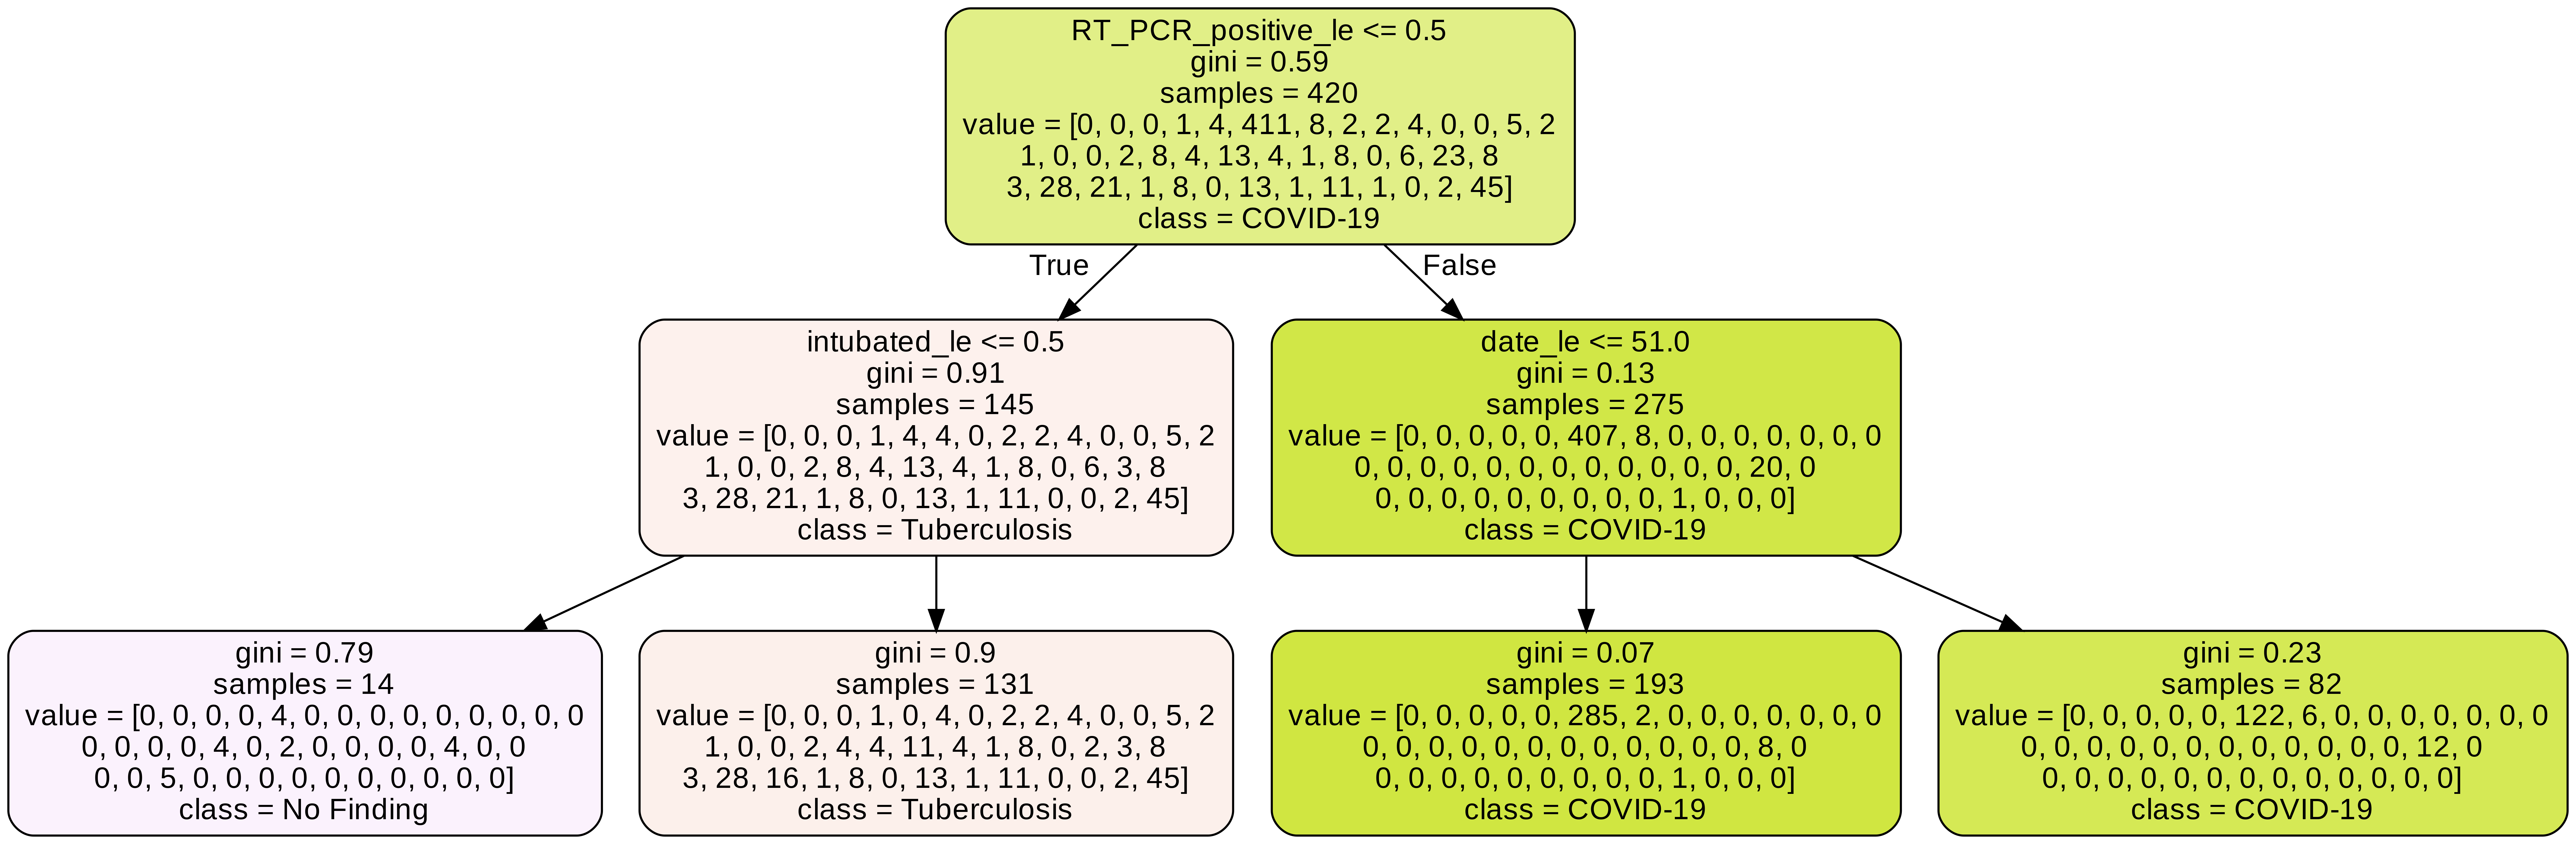

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = X.columns,
                class_names = le.classes_,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

## 極限梯度提升樹(eXtreme Gradient Boosting)

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

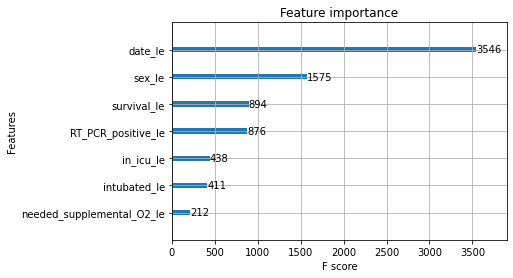

In [ ]:
plot_importance(model)